**NoteBook 2- Mortality Status Classifiers, their performances and Hyperparameters optimisations.**

Name: Pahandi Samarasinghe

IIT ID: 20231228

UOW ID: w2052243


Code reuse session 2 Part 1, 7, 9, 18, 19, 20, 24, 27

In [1]:
import pandas as pd # For data handling and DataFrame operations
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For enhanced data visualization with statistical plots
import plotly.express as px # For interactive plots

from sklearn.model_selection import train_test_split, GridSearchCV # For splitting data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from sklearn.metrics import (
    accuracy_score,# To measure the accuracy of predictions
    confusion_matrix, # To compute the confusion matrix
    classification_report,# To get precision, recall, f-score, etc.
    roc_auc_score,# To evaluate classification performance using AUC-ROC
    ConfusionMatrixDisplay, # To visualize the confusion matrix
    RocCurveDisplay # To plot ROC curve
)

Code reuse session 2 Part 2, 3

In [2]:
# Load cleaned classification dataset from Notebook 1 output
df = pd.read_csv("/content/drive/MyDrive/ML CW/cancer_mortality_classification.csv")
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset shape: (3799, 14)

Columns: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months', 'Mortality_Status']


,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,0,0,0,3,0,4.0,1,1,24.0,1,60,1
1,50.0,1,1,1,1,2,0,35.0,1,1,14.0,5,62,1
2,58.0,2,2,4,1,2,0,63.0,1,1,14.0,7,75,1
3,58.0,0,0,0,0,3,0,18.0,1,1,2.0,1,84,1
4,47.0,1,0,2,0,3,0,41.0,1,1,3.0,1,50,1


Code reuse session 1 Part 7

In [3]:
# Basic descriptive statistics and class balance check

print("Descriptive Statistics:")
print(df.describe().transpose())

print("\nClass Distribution (0 = Dead, 1 = Alive):")
print(df['Mortality_Status'].value_counts(normalize=True))

Descriptive Statistics:
                         count       mean        std   min   25%   50%   75%  \
Age                     3799.0  54.068439   8.939063  30.0  47.0  54.0  62.0   
T_Stage                 3799.0   0.706502   0.707990   0.0   0.0   1.0   1.0   
N_Stage                 3799.0   0.411951   0.675747   0.0   0.0   0.0   1.0   
6th_Stage               3799.0   1.299553   1.250499   0.0   0.0   1.0   2.0   
Differentiated          3799.0   0.871282   0.639670   0.0   0.0   1.0   1.0   
Grade                   3799.0   2.146618   0.635805   1.0   2.0   2.0   3.0   
A_Stage                 3799.0   0.018952   0.136375   0.0   0.0   0.0   0.0   
Tumor_Size              3799.0  26.919189  15.054773   1.0  15.0  23.0  35.0   
Estrogen_Status         3799.0   0.937089   0.242835   0.0   1.0   1.0   1.0   
Progesterone_Status     3799.0   0.830482   0.375258   0.0   1.0   1.0   1.0   
Regional_Node_Examined  3799.0  14.276652   8.150219   1.0   9.0  14.0  19.0   
Regional_Node_Po


# Mortality Status Prediction


Code reuse session 2 Part 3

In [4]:
df.head()#to access recorded data values per variable

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,0,0,0,3,0,4.0,1,1,24.0,1,60,1
1,50.0,1,1,1,1,2,0,35.0,1,1,14.0,5,62,1
2,58.0,2,2,4,1,2,0,63.0,1,1,14.0,7,75,1
3,58.0,0,0,0,0,3,0,18.0,1,1,2.0,1,84,1
4,47.0,1,0,2,0,3,0,41.0,1,1,3.0,1,50,1


Code reuse session 1 Part 10

In [5]:
df.isnull().sum()#shows the count of patients who have missing values per variable.

,0
Age,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0
Progesterone_Status,0


Code reuse session 2 Part 6

In [6]:
X = df.drop(columns=["Mortality_Status"])# Remove the 'Mortality_Status' column from the DataFrame to use the remaining columns as features
y = df["Mortality_Status"]# Store the 'Mortality_Status' column separately as the target variable

Code reuse session 2 Part 8

In [7]:
# Split the data (Stratify to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
print("Features used for classification model:\n")# Print the features (column names) used in the classification model
for feature in X_train.columns:
    print("-", feature)

print("\nTraining set shape:", X_train.shape)# Print the shape (number of rows and columns) of the training set
print("Test set shape:", X_test.shape)# Print the shape of the test set

Features used for classification model:

- Age
- T_Stage
- N_Stage
- 6th_Stage
- Differentiated
- Grade
- A_Stage
- Tumor_Size
- Estrogen_Status
- Progesterone_Status
- Regional_Node_Examined
- Regional_Node_Positive
- Survival_Months

Training set shape: (3039, 13)
Test set shape: (760, 13)


In [9]:
print('Whole Data shape', df.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)

Whole Data shape (3799, 14)
X train shape (3039, 13)
X test shape (760, 13)


Code reuse session 2 Part 10, 11

In [10]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)# Create an instance of the LogisticRegression model with a maximum of 1000 iterations
logreg.fit(X_train, y_train)# Train the logistic regression model using the training data

LogisticRegression(max_iter=1000)

Code reuse session 2 Part 12

In [11]:
# Predictions
y_pred_train=logreg.predict(X_train)# Make predictions on the training data
y_pred_test=logreg.predict(X_test)# Make predictions on the test data
y_proba_lr = logreg.predict_proba(X_test)[:, 1]# Get the predicted probabilities for the positive class (label 1) on the test data

Code reuse session 2 Part 15, 16

In [12]:
# Evaluation
#to assess how well your model learnt the training patients subset.
accuracy = accuracy_score(y_train, y_pred_train)
print ("The Logistic Regression training Model Accuracy: ", accuracy)

#to assess how well your model predicts the mortality status of new cancer patients.
accuracy = accuracy_score(y_test, y_pred_test)
print ("Logistic Regression prediction Accuracy:: ", accuracy)

The Logistic Regression training Model Accuracy:  0.8953603158933859
Logistic Regression prediction Accuracy::  0.8934210526315789


Code reuse session 2 part 14

In [13]:
#comparison
Comparison_df = pd.DataFrame({'Actual Mortality Status' : y_test,'Predicted Mortality Status' : y_pred_test})
Comparison_df.to_csv(r'/content/drive/MyDrive/ML CW/Mortality_Status_Comparison_df.csv', index=True)
Comparison_df

,Actual Mortality Status,Predicted Mortality Status
3210,0,1
2864,1,1
2241,1,1
1814,1,1
3537,1,1
...,...,...
429,1,1
3536,1,1
3248,0,1
3456,0,1


Code reuse session 2 part 17

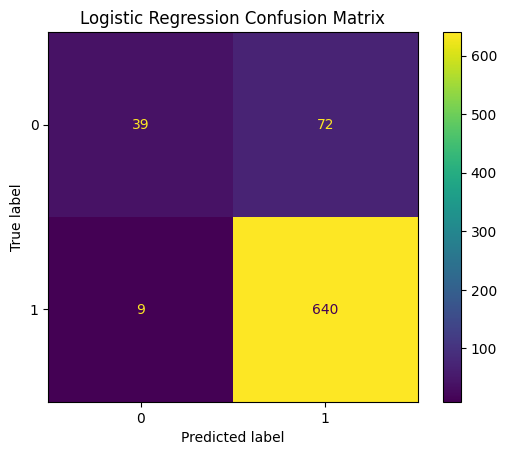

In [14]:
# Confusion Matrix
#to assess how well the model predicted the mortality status of all new cancer patients in the unseen data subset.
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred_test, labels = logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Code reuse session 2 part 18

In [15]:
# Classification Report
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_test))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.35      0.49       111
           1       0.90      0.99      0.94       649

    accuracy                           0.89       760
   macro avg       0.86      0.67      0.72       760
weighted avg       0.89      0.89      0.87       760



Code reuse session 2 part 19

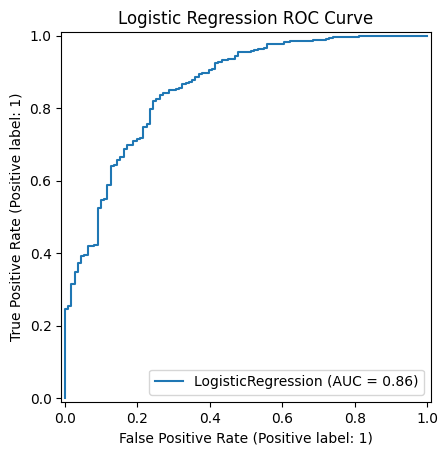

In [16]:
#AUC-ROC
#to give a good indication of the model's discriminative ability between "Dead" and "Alive" mortality classes.
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()

Code reuse session 2 part 21, 22

In [17]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

Code reuse session 2 part 23

In [18]:
# KNN Predictions
y_pred_knn_train=knn.predict(X_train)
y_pred_knn_test=knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

Code reuse session 2 Part 15, 16

In [19]:
# Evaluation
#to assess how well your model learnt the training patients subset.
accuracy = accuracy_score(y_train, y_pred_knn_train)
print ("KNN training Accuracy: ", accuracy)

#to assess how well your model predicts the mortality status of new cancer patients.
accuracy = accuracy_score(y_test, y_pred_knn_test)
print ("KNN prediction Accuracy:: ", accuracy)

KNN training Accuracy:  0.9052319842053307
KNN prediction Accuracy::  0.9013157894736842


Code reuse session 2 part 17

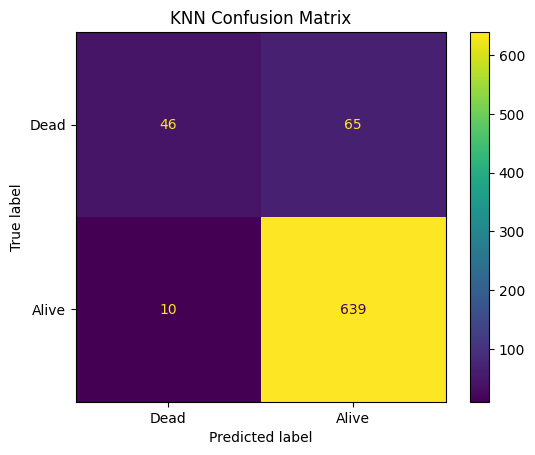

In [20]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=['Dead', 'Alive'])
plt.title("KNN Confusion Matrix")
plt.show()

Code reuse session 2 part 18

In [21]:
# Classification Report
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn_test, target_names=['Dead', 'Alive']))

KNN Classification Report:

              precision    recall  f1-score   support

        Dead       0.82      0.41      0.55       111
       Alive       0.91      0.98      0.94       649

    accuracy                           0.90       760
   macro avg       0.86      0.70      0.75       760
weighted avg       0.90      0.90      0.89       760



Code reuse session 2 part 19

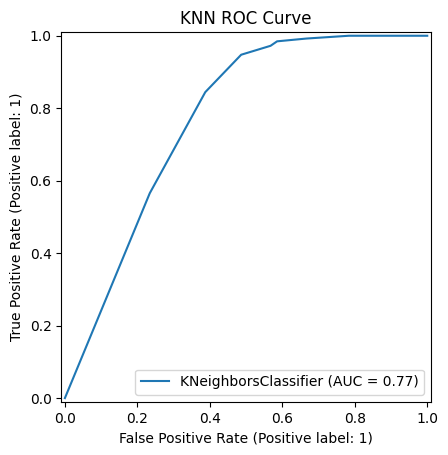

In [22]:
# ROC Curve
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN ROC Curve")
plt.show()

Code reuse session 2 part 27

In [23]:
# Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
# Naïve Bayes Predictions
y_pred_nb_train=knn.predict(X_train)
y_pred_nb_test=knn.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

Code reuse session 2 part 15, 16

In [25]:
# Evaluation
#to assess how well your model learnt the training patients subset.
accuracy = accuracy_score(y_train, y_pred_nb_train)
print ("Naïve Bayes training Accuracy: ", accuracy)

#to assess how well your model predicts the mortality status of new cancer patients.
accuracy = accuracy_score(y_test, y_pred_nb_test)
print ("Naïve Bayes prediction Accuracy:: ", accuracy)

Naïve Bayes training Accuracy:  0.9052319842053307
Naïve Bayes prediction Accuracy::  0.9013157894736842


Code reuse session 2 part 17

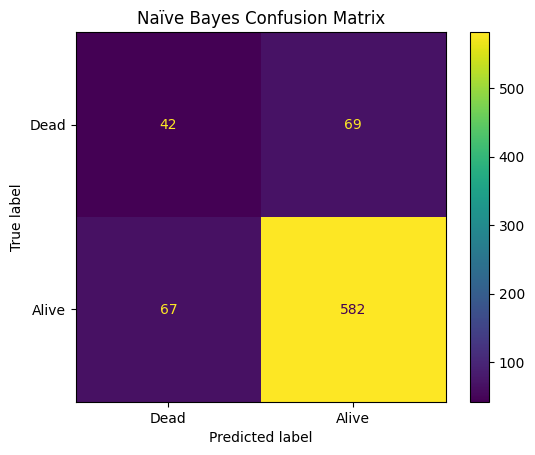

In [26]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, display_labels=['Dead', 'Alive'])
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

Code reuse session 2 part 18

In [27]:
# Classification Report
print("Naïve Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb_test, target_names=['Dead', 'Alive']))

Naïve Bayes Classification Report:

              precision    recall  f1-score   support

        Dead       0.82      0.41      0.55       111
       Alive       0.91      0.98      0.94       649

    accuracy                           0.90       760
   macro avg       0.86      0.70      0.75       760
weighted avg       0.90      0.90      0.89       760



Code reuse session 2 part 19

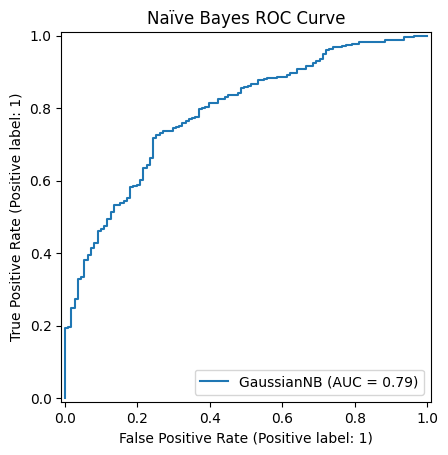

In [28]:
# ROC Curve
RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.title("Naïve Bayes ROC Curve")
plt.show()

Code reuse session 2 part 25

In [29]:
# Logistic Regression Hyperparameter Tuning
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_gscv = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
lr_gscv.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", lr_gscv.best_params_)
best_lr = lr_gscv.best_estimator_

Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'liblinear'}


Code reuse session 2 part 17, 18, 19

Tuned LR Accuracy: 0.8921052631578947
Tuned LR AUC-ROC: 0.8583822651619262


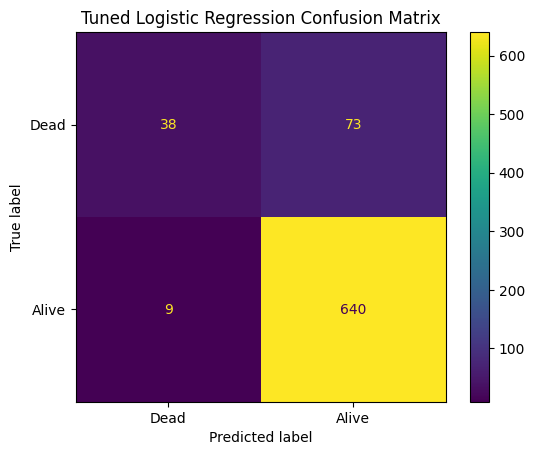

Tuned Logistic Regression Classification Report:

              precision    recall  f1-score   support

        Dead       0.81      0.34      0.48       111
       Alive       0.90      0.99      0.94       649

    accuracy                           0.89       760
   macro avg       0.85      0.66      0.71       760
weighted avg       0.88      0.89      0.87       760



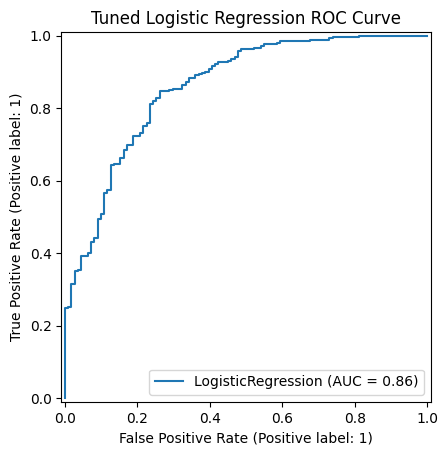

In [30]:
# Evaluate Best Logistic Regression
y_pred_best_lr = best_lr.predict(X_test)
print("Tuned LR Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("Tuned LR AUC-ROC:", roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1]))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dead", "Alive"])
disp.plot()

plt.title("Tuned Logistic Regression Confusion Matrix")
plt.show()

print("Tuned Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_best_lr, target_names=['Dead', 'Alive']))

RocCurveDisplay.from_estimator(best_lr, X_test, y_test)
plt.title("Tuned Logistic Regression ROC Curve")
plt.show()

Code reuse session 2 part 25

In [31]:
# KNN Hyperparameter Tuning
param_grid_knn = {'n_neighbors':[3, 5, 7, 9, 11,13], 'weights': ['uniform', 'distance']}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
knn_gscv.fit(X_train, y_train)
print("Best KNN Parameters:", knn_gscv.best_params_)
best_knn = knn_gscv.best_estimator_

Best KNN Parameters: {'n_neighbors': 13, 'weights': 'distance'}


In [32]:
# Evaluate Best KNN
y_pred_best_knn = best_knn.predict(X_test)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Tuned KNN AUC-ROC:", roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]))

Tuned KNN Accuracy: 0.9026315789473685
Tuned KNN AUC-ROC: 0.7964158303141354


Code reuse session 2 part 25

In [33]:
# Naïve Bayes Hyperparameter Tuning (optional, minimal effect)
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
nb_gscv = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='roc_auc')
nb_gscv.fit(X_train, y_train)
print("Best Naïve Bayes Parameters:", nb_gscv.best_params_)
best_nb = nb_gscv.best_estimator_

Best Naïve Bayes Parameters: {'var_smoothing': 1e-07}


In [34]:
# Evaluate Best Naïve Bayes
y_pred_best_nb = best_nb.predict(X_test)
print("Tuned NB Accuracy:", accuracy_score(y_test, y_pred_best_nb))
print("Tuned NB AUC-ROC:", roc_auc_score(y_test, best_nb.predict_proba(X_test)[:, 1]))

Tuned NB Accuracy: 0.8210526315789474
Tuned NB AUC-ROC: 0.7878787878787878


In [35]:
# Evaluate best models from GridSearchCV

Code reuse session 2 part 26

In [36]:
# Tuned Logistic Regression
best_lr = lr_gscv.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Tuned Logistic Regression AUC-ROC:", roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1]))

Tuned Logistic Regression Accuracy: 0.8921052631578947
Tuned Logistic Regression AUC-ROC: 0.8583822651619262


Code reuse session 2 part 26

In [37]:
# Tuned KNN
best_knn = knn_gscv.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("Tuned KNN AUC-ROC:", roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]))

Tuned KNN Accuracy: 0.9026315789473685
Tuned KNN AUC-ROC: 0.7964158303141354


Code reuse session 2 part 26

In [38]:
# Tuned Naïve Bayes
best_nb = nb_gscv.best_estimator_
y_pred_nb_tuned = best_nb.predict(X_test)
print("Tuned Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb_tuned))
print("Tuned Naïve Bayes AUC-ROC:", roc_auc_score(y_test, best_nb.predict_proba(X_test)[:, 1]))

Tuned Naïve Bayes Accuracy: 0.8210526315789474
Tuned Naïve Bayes AUC-ROC: 0.7878787878787878


In [39]:
# Final comparison table

results = {
    'Model': ['Logistic Regression', 'KNN', 'Naïve Bayes', 'Tuned LR', 'Tuned KNN', 'Tuned NB'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_knn_test),
        accuracy_score(y_test, y_pred_nb_test),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_nb_tuned)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, y_proba_nb),
        roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, best_nb.predict_proba(X_test)[:, 1])
    ]
}

results_df = pd.DataFrame(results)
results_df.sort_values(by='AUC-ROC', ascending=False).reset_index(drop=True)

,Model,Accuracy,AUC-ROC
0,Tuned LR,0.892105,0.858382
1,Logistic Regression,0.893421,0.857591
2,Tuned KNN,0.902632,0.796416
3,Tuned NB,0.821053,0.787879
4,Naïve Bayes,0.901316,0.787837
5,KNN,0.901316,0.771471
